<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Assignment 3</h1>
<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">Commit your solutions to GitHub until June 21, 23:59</h4>
</div>
<br>

## Part 1 
## Sentiment Evaluation of Twitter and YouTube Data

### Tasks

1. Install packages and load evaluation datasets with Google NLP scores
2. Run VADER over evaluation texts
3. Run BERT over evaluation texts
4. Evaluate against sentiment annotations and compare with Google NLP

### Install requirements. 

The following cell contains all the necessary dependencies needed for this task. If you run the cell everything will be installed. 

* [`vaderSentiment`](https://github.com/cjhutto/vaderSentiment) is a Python package for a Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text.
* [`transformers`](https://huggingface.co/) is a Python package for creating and working with transformers. [Here](https://huggingface.co/docs) is the documentation of `transformers`.
* [`torch`](https://pytorch.org/) is a Python machine learning framework. We need this here for `transformers` since this package uses internally `torch`. [Here](https://pytorch.org/docs/stable/index.html) is the documentation of `torch`.
* [`pandas`](https://pandas.pydata.org/docs/index.html) is a Python package for creating and working with tabular data. [Here](https://pandas.pydata.org/docs/reference/index.html) is the documentation of `pandas`.

In [2]:
# ! pip install vaderSentiment
# ! pip install transformers
# ! pip install torch
# ! pip install pandas
# ! pip install emoji==0.6.0

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


You may need to restart the Kernel after installing the dependencies!

### Import requirements
The cell below imports all necessary dependancies. Make sure they are installed (see cell above).

In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Exercise 1: Load evaluation datasets and Google NLP scores

#### 1.1 Load datasets
First read the Twitter and Youtube Comments CSV files (`Twitter-Sentiment.csv` and `YouTubeComments-Sentiment.csv`) and save them in a pandas Dataframe.

In [3]:
twitter_df = pd.read_csv("Twitter-Sentiment.csv")
youtube_df = pd.read_csv("YouTubeComments-Sentiment.csv")

### Exercise 2: Run VADER over evaluation texts *(2 points)*

#### 2.1 Run VADER over the first tweet

In this task you should use VADER for sentiment analysis. For this we use the `vaderSentiment` package. You first have to instantiate a new `SentimentIntensityAnalyzer` and use the `polarity_scores` method of it for the analysis. Apply this for the first tweet. Is it a good classification?

[Here](https://github.com/cjhutto/vaderSentiment) under 'Code Examples' you can find some example code how to use this package.

In [4]:
analyzer = SentimentIntensityAnalyzer()
first_tweet_analysis = analyzer.polarity_scores(twitter_df.text[0])
print(twitter_df.text[0] + str(first_tweet_analysis) + '\nActual label: ' + twitter_df.label[0])

# There is a 0.0 negative score, with a mostly neutral and slightly positive score. The given label is positive and the googleScore 
# was also slightly positive. Plus, me as a human reading this will also say it is mildly positive, so I would say based on this one 
# tweet the classificiation could be good.

?RT @justinbiebcr: The bigger the better....if you know what I mean ;){'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.2263}
Actual label: Positive


#### 2.2 Run VADER over each text

Now use VADER for all the text data of the Twitter and the Youtube dataframe. Create a new column in the dataframes called `VADER_compound` where you save the `compound` result (look at the output dictonary of the `polarity_scores` method).

*Important: Make sure `compound` is a float*

In [5]:
twitter_df['VADER_compound'] = [float(analyzer.polarity_scores(text)['compound']) for text in twitter_df.text]
youtube_df['VADER_compound'] = [float(analyzer.polarity_scores(text)['compound']) for text in youtube_df.text]

#### 2.3 VADER as a classifier

To get the three Classes `Positive`, `Negative` and `Neutral` we use the compound score with the following thresholds:

* `compound > 0.5`: `"Positive"`
* `compound < -0.5`: `"Negative"`
* `else`: `"Neutral"`

Create a new column called `VADER_class` which contains the three computed classes.

In [6]:
twitter_df["VADER_class"] = ['Positive' if score > 0.5 else 'Negative' if score < -0.5 else 'Neutral' for score in twitter_df.VADER_compound]
youtube_df["VADER_class"] = ['Positive' if score > 0.5 else 'Negative' if score < -0.5 else 'Neutral' for score in youtube_df.VADER_compound]

### Exercise 3: Use a BERT based model for sentiment analysis *(2 points)*

#### 3.1 BERT
BERT (Bidirectional Encoder Representation from Transformers) is a machine learning technique for natural language processing. There are already pretrained models available in the `transformers` package. You can look [here](https://huggingface.co/models?sort=downloads&search=sentiment) and choose a model for the next tasks. (We suggest [this](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest) (`"cardiffnlp/twitter-roberta-base-sentiment-latest"`) model, but you can use any available, just make sure it is suitable for sentiment analysis).

First create a `pipeline` where you set your model by the `model` keyword argument. You can then use this method to pass text which should be classified. [Here](https://huggingface.co/blog/sentiment-analysis-python#2-how-to-use-pre-trained-sentiment-analysis-models-with-python) is a tutorial how to use this.

As before save the classes in a new column 'BERT_class'. The call to your pipeline returns a dictionary where there is a key `label` which contains already the `positive`, `negative` or `neutral` class (Be aware that this is based on the model you choose, and might be different from the labels in the dataset. If that's the case you have to rename them to match the target labels).

***Hint: The classification of the entire sample can take a couple of minutes. Make sure to save the labeled dataset in a csv file so that you don't need to rerun the classification the next time you run your notebook.***

In [50]:
# Hint -> loading roberta as a pipline
sentiment_pipeline = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest", tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
# Hint -> using a pipline for classification
# sentiment_pipeline('Today is a great day!')[0]['label']

# saved as a csv so no need to run it again later

# twitter_df["BERT_class"] = [sentiment_pipeline(text)[0]['label'] for text in twitter_df.text]
# twitter_df.to_csv('full_twitter.csv', index=False)
# youtube_df["BERT_class"] = [sentiment_pipeline(text)[0]['label'] for text in youtube_df.text]
# youtube_df.to_csv('full_youtube.csv', index=False)

twitter_df = pd.read_csv("full_twitter.csv")
youtube_df = pd.read_csv("full_youtube.csv")

### Exercise 4: Evaluate against sentiment annotations and compare with Google NLP *(4 points)*

#### 4.1 Convert GoogleNLP scores to classes

As with VADER and BERT, compute classes from the GoogleNLP score, which is given in the column `googleScore`. For this use following thresholds:

* `googleScore > 0.3`: `"Positive"`
* `googleScore < -0.3`: `"Negative"`
* `else`: `"Neutral"`

Save the classes in a new column named `GoogleNLP_class`.


In [8]:
twitter_df["GoogleNLP_class"] = ['Positive' if score > 0.3 else 'Negative' if score < -0.3 else 'Neutral' for score in twitter_df.googleScore]
youtube_df["GoogleNLP_class"] = ['Positive' if score > 0.3 else 'Negative' if score < -0.3 else 'Neutral' for score in youtube_df.googleScore]

#### 4.2 Evaluate on Twitter

First, let's calculate the accuracy for all three classifiers on the Twitter and Youtube data, print the results.

In [22]:
def classCounter(df:pd.DataFrame, col:str, calcType:str, reverse = False, inverse=False, customWord=None, label='label'):
    """
    Counts the number of times combinations of labels occur in a DataFrame for emotion detection and sentiment analysis
    
    Arguments:
    df: Dataframe to be used
    col: col with the data
    calcType: Whether the positive or negative, true or false value is wanted, custom is also an option
    reverse: The reverse polarity of the stat ie positive becomes negative and negative becomes positive
    inverse: The exact oppositite of the stat ie true positive becomes false negative
    customWord: The word to match if custom option given in calcType
    label: The column with the correct label in the DataFrame
    """
    if calcType == 'fp' or ((calcType == 'tp') & (reverse == True)) or ((calcType == 'tn') & (inverse == True)):
        return ((df[col].str.lower() == 'positive') & (df[label].str.lower() == 'negative')).sum()
    if calcType == 'fn' or ((calcType == 'tn') & (reverse == True)) or ((calcType == 'tp') & (inverse == True)):
        return ((df[col].str.lower() == 'negative') & (df[label].str.lower() == 'positive')).sum()
    if calcType == 'tp':
        return ((df[col].str.lower() == 'positive') & (df[label].str.lower() == 'positive')).sum()
    if calcType == 'tn':
        return ((df[col].str.lower() == 'negative') & (df[label].str.lower() == 'negative')).sum()
    if calcType == 'custom':
        if customWord == None:
            return ((((df[col].str.lower() == df[label].str.lower())).sum()))
        if reverse:
        # to get false positive
            return ((df[col].str.lower() == customWord) & (df[label].str.lower() != customWord)).sum()
        # to get false negative
        if inverse:
            return ((df[col].str.lower() != customWord) & (df[label].str.lower() == customWord)).sum()
        return ((df[col].str.lower() == customWord) & (df[label].str.lower() == customWord)).sum()
    return 'This calculation type is not available, please choose between tp, tn, fp, fn, or custom word'


def sentStats(df: pd.DataFrame, col: str, statType: str, calcType = None):
    """
    Calculates relevant statistics in sentiment analysis and emotion detection from data in a DataFrame

    Arguments:
    df: The DataFrame to use
    col: The column to calculate with
    statType: The desired statistic
    calcType: Whether the positive or negative, true or false value is wanted
    """
    
    if statType == 'accuracy':
        tp, tn, fp, fn = classCounter(df, col, 'tp'), classCounter(df, col, 'tn'), classCounter(df, col, 'fp'), classCounter(df, col, 'fn')
        # this omits neutral texts in the calculation
        return (tp + tn) / (tp + tn + fp + fn)
    if statType == 'precision':
        # counter that finds the amount of times the desired calcType is found
        cT = classCounter(df, col, calcType)
        # reverse is found meaning the for tp then the tn is calculated etc
        return (cT / (cT + classCounter(df, col, calcType, reverse=True)))
    if statType == 'recall':
        cT = classCounter(df, col, calcType)
        # inverse is found meaning the for tp then the fn is calculated etc
        return (cT / (cT + classCounter(df, col, calcType, inverse=True)))
    if statType == 'F1':
        # calls the function itself to find precision and recall
        precision, recall = sentStats(df, col, 'precision', calcType), sentStats(df, col, 'recall', calcType)
        return (2 * (precision * recall) / (precision + recall))
    return 'This statistic type is not available, please choose between accuracy, precision, recall, and F1.'

In [10]:
# I know that I could've made a funciton to fill this up more efficiently but at this point I wanted to just have something that works
# Each row is one statistic once for each model in the order GoogleNLP, BERT, and VADER
model_stats = {
    'Accuracy Twitter': (sentStats(twitter_df, 'GoogleNLP_class', 'accuracy'), sentStats(twitter_df, 'BERT_class', 'accuracy'), sentStats(twitter_df, 'VADER_class', 'accuracy')), 
    'Accuracy YouTube': (sentStats(youtube_df, 'GoogleNLP_class', 'accuracy'), sentStats(youtube_df, 'BERT_class', 'accuracy'), sentStats(youtube_df, 'VADER_class', 'accuracy')),
    'Positive Precision Twitter': (sentStats(twitter_df, 'GoogleNLP_class', 'precision', 'tp'), sentStats(twitter_df, 'BERT_class', 'precision', 'tp'), sentStats(twitter_df, 'VADER_class', 'precision', 'tp')),
    'Positive Precision YouTube': (sentStats(youtube_df, 'GoogleNLP_class', 'precision', 'tp'), sentStats(youtube_df, 'BERT_class', 'precision', 'tp'), sentStats(youtube_df, 'VADER_class', 'precision', 'tp')), 
    'Negative Precision Twitter': (sentStats(twitter_df, 'GoogleNLP_class', 'precision', 'tn'), sentStats(twitter_df, 'BERT_class', 'precision', 'tn'), sentStats(twitter_df, 'VADER_class', 'precision', 'tn')),
    'Negative Precision YouTube': (sentStats(youtube_df, 'GoogleNLP_class', 'precision', 'tn'), sentStats(youtube_df, 'BERT_class', 'precision', 'tn'), sentStats(youtube_df, 'VADER_class', 'precision', 'tn')),
    'Positive Recall Twitter': (sentStats(twitter_df, 'GoogleNLP_class', 'recall', 'tp'), sentStats(twitter_df, 'BERT_class', 'recall', 'tp'), sentStats(twitter_df, 'VADER_class', 'recall', 'tp')),
    'Positive Recall YouTube': (sentStats(youtube_df, 'GoogleNLP_class', 'recall', 'tp'), sentStats(youtube_df, 'BERT_class', 'recall', 'tp'), sentStats(youtube_df, 'VADER_class', 'recall', 'tp')), 
    'Negative Recall Twitter': (sentStats(twitter_df, 'GoogleNLP_class', 'recall', 'tn'), sentStats(twitter_df, 'BERT_class', 'recall', 'tn'), sentStats(twitter_df, 'VADER_class', 'recall', 'tn')),
    'Negative Recall YouTube': (sentStats(youtube_df, 'GoogleNLP_class', 'recall', 'tn'), sentStats(youtube_df, 'BERT_class', 'recall', 'tn'), sentStats(youtube_df, 'VADER_class', 'recall', 'tn')),
    'Positive F1 Twitter': (sentStats(twitter_df, 'GoogleNLP_class', 'F1', 'tp'), sentStats(twitter_df, 'BERT_class', 'F1', 'tp'), sentStats(twitter_df, 'VADER_class', 'F1', 'tp')),
    'Positive F1 YouTube': (sentStats(youtube_df, 'GoogleNLP_class', 'F1', 'tp'), sentStats(youtube_df, 'BERT_class', 'F1', 'tp'), sentStats(youtube_df, 'VADER_class', 'F1', 'tp')), 
    'Negative F1 Twitter': (sentStats(twitter_df, 'GoogleNLP_class', 'F1', 'tn'), sentStats(twitter_df, 'BERT_class', 'F1', 'tn'), sentStats(twitter_df, 'VADER_class', 'F1', 'tn')),
    'Negative F1 YouTube': (sentStats(youtube_df, 'GoogleNLP_class', 'F1', 'tn'), sentStats(youtube_df, 'BERT_class', 'F1', 'tn'), sentStats(youtube_df, 'VADER_class', 'F1', 'tn'))}


print(f"The accuracy of GoogleNLP, BERT, and VADER for Twitter data is {round(100 * model_stats['Accuracy Twitter'][0], 2)}%, {round(100 * model_stats['Accuracy Twitter'][1], 2)}%, {round(100 * model_stats['Accuracy Twitter'][2], 2)}%, respectively.")
print(f"The accuracy of GoogleNLP, BERT, and VADER for YouTube data is {round(100 * model_stats['Accuracy YouTube'][0], 2)}%, {round(100 * model_stats['Accuracy YouTube'][1], 2)}%, {round(100 * model_stats['Accuracy YouTube'][2], 2)}%, respectively.")

The accuracy of GoogleNLP, BERT, and VADER for Twitter data is 94.21%, 94.44%, 89.95%, respectively.
The accuracy of GoogleNLP, BERT, and VADER for YouTube data is 97.07%, 96.35%, 91.85%, respectively.


Next calculate the precision of the `"Positive"` class for the Twitter and Youtube data.
This is calculated as follows:
$
\begin{align}
    precision = \frac{TP}{TP + FP}
\end{align}
$
*Note: Here the Positive samples are the one with the class `"Positive"`*

In [10]:
print(f"The positive precision of GoogleNLP, BERT, and VADER for Twitter data is {round(100 * model_stats['Positive Precision Twitter'][0], 2)}%, {round(100 * model_stats['Positive Precision Twitter'][1], 2)}%, {round(100 * model_stats['Positive Precision Twitter'][2], 2)}%, respectively.")
print(f"The positive precision of GoogleNLP, BERT, and VADER for YouTube data is {round(100 * model_stats['Positive Precision YouTube'][0], 2)}%, {round(100 * model_stats['Positive Precision YouTube'][1], 2)}%, {round(100 * model_stats['Positive Precision YouTube'][2], 2)}%, respectively.")

The positive precision of GoogleNLP, BERT, and VADER for Twitter data is 94.52%, 94.05%, 89.52%, respectively.
The positive precision of GoogleNLP, BERT, and VADER for YouTube data is 98.39%, 98.28%, 92.49%, respectively.


Now calculate the recall score. This is done by:
$
\begin{align}
    recall = \frac{TP}{TP + FN}
\end{align}
$
*Note: Here the Positive samples are the one with the the class `"Positive"`*

In [11]:
print(f"The positive recall of GoogleNLP, BERT, and VADER for Twitter data is {round(100 * model_stats['Positive Recall Twitter'][0], 2)}%, {round(100 * model_stats['Positive Recall Twitter'][1], 2)}%, {round(100 * model_stats['Positive Recall Twitter'][2], 2)}%, respectively.")
print(f"The positive recall of GoogleNLP, BERT, and VADER for YouTube data is {round(100 * model_stats['Positive Recall YouTube'][0], 2)}%, {round(100 * model_stats['Positive Recall YouTube'][1], 2)}%, {round(100 * model_stats['Positive Recall YouTube'][2], 2)}%, respectively.")

The positive recall of GoogleNLP, BERT, and VADER for Twitter data is 97.33%, 97.11%, 97.05%, respectively.
The positive recall of GoogleNLP, BERT, and VADER for YouTube data is 97.96%, 96.7%, 97.44%, respectively.


Calculate the Recall and the Precision score now also for the negative class. The Precision is calculated as:
$
\begin{align}
    precision = \frac{TP}{TP + FP}
\end{align}
$
*Note: Here the Positive samples are the one with the the class `"Negative"`*

And the Recall is calculated as:
$
\begin{align}
    recall = \frac{TP}{TP + FN}
\end{align}
$
*Note: Here the Positive samples are the one with the the class `"Negative"`*

In [12]:
print(f"The negative precision of GoogleNLP, BERT, and VADER for Twitter data is {round(100 * model_stats['Negative Precision Twitter'][0], 2)}%, {round(100 * model_stats['Negative Precision Twitter'][1], 2)}%, {round(100 * model_stats['Negative Precision Twitter'][2], 2)}%, respectively.")
print(f"The negative precision of GoogleNLP, BERT, and VADER for YouTube data is {round(100 * model_stats['Negative Precision YouTube'][0], 2)}%, {round(100 * model_stats['Negative Precision YouTube'][1], 2)}%, {round(100 * model_stats['Negative Precision YouTube'][2], 2)}%, respectively.")
print(f"The negative recall of GoogleNLP, BERT, and VADER for Twitter data is {round(100 * model_stats['Negative Recall Twitter'][0], 2)}%, {round(100 * model_stats['Negative Recall Twitter'][1], 2)}%, {round(100 * model_stats['Negative Recall Twitter'][2], 2)}%, respectively.")
print(f"The negative recall of GoogleNLP, BERT, and VADER for YouTube data is {round(100 * model_stats['Negative Recall YouTube'][0], 2)}%, {round(100 * model_stats['Negative Recall YouTube'][1], 2)}%, {round(100 * model_stats['Negative Recall YouTube'][2], 2)}%, respectively.")

The negative precision of GoogleNLP, BERT, and VADER for Twitter data is 93.43%, 95.12%, 91.33%, respectively.
The negative precision of GoogleNLP, BERT, and VADER for YouTube data is 91.85%, 91.4%, 88.94%, respectively.
The negative recall of GoogleNLP, BERT, and VADER for Twitter data is 87.07%, 90.17%, 73.26%, respectively.
The negative recall of GoogleNLP, BERT, and VADER for YouTube data is 93.45%, 95.4%, 72.28%, respectively.


Last, calculate the [F1 score](https://towardsdatascience.com/the-f1-score-bec2bbc38aa6) of the positive and negative class for each classifier and dataset. The F1 score is calculated as:

$
\begin{align}
    F_1 = 2 * \frac{precision * recall}{precision + recall}
\end{align}
$

In [14]:
print(f"The positive F1 score of GoogleNLP, BERT, and VADER for Twitter data is {round(model_stats['Positive F1 Twitter'][0], 2)}, {round(model_stats['Positive F1 Twitter'][1], 2)}, {round(model_stats['Positive F1 Twitter'][2], 2)}, respectively.")
print(f"The negative F1 score of GoogleNLP, BERT, and VADER for Twitter data is {round(model_stats['Negative F1 Twitter'][0], 2)}, {round(model_stats['Negative F1 Twitter'][1], 2)}, {round(model_stats['Negative F1 Twitter'][2], 2)}, respectively.")
print(f"The positive F1 score of GoogleNLP, BERT, and VADER for YouTube data is {round(model_stats['Positive F1 YouTube'][0], 2)}, {round(model_stats['Positive F1 YouTube'][1], 2)}, {round(model_stats['Positive F1 YouTube'][2], 2)}, respectively.")
print(f"The negative F1 score of GoogleNLP, BERT, and VADER for YouTube data is {round(model_stats['Negative F1 YouTube'][0], 2)}, {round(model_stats['Negative F1 YouTube'][1], 2)}, {round(model_stats['Negative F1 YouTube'][2], 2)}, respectively.")

The positive F1 score of GoogleNLP, BERT, and VADER for Twitter data is 0.96, 0.96, 0.93, respectively.
The negative F1 score of GoogleNLP, BERT, and VADER for Twitter data is 0.9, 0.93, 0.81, respectively.
The positive F1 score of GoogleNLP, BERT, and VADER for YouTube data is 0.98, 0.97, 0.95, respectively.
The negative F1 score of GoogleNLP, BERT, and VADER for YouTube data is 0.93, 0.93, 0.8, respectively.


### Exercise 5: Comparison *(2 points)*
* What was the best performing method for Youtube? Did that fit your expectations?
* What was the best performing method for Twitter? Did that fit your expectations?
* Do you observe any differences between prediction of positive and negative sentiment? What is the role of the imbalance between postive and negative classes in the calculation of accuracy?


Text(0.5, 0.98, 'Sentiment Analysis Comparision between GoogleNLP, BERT and VADER')

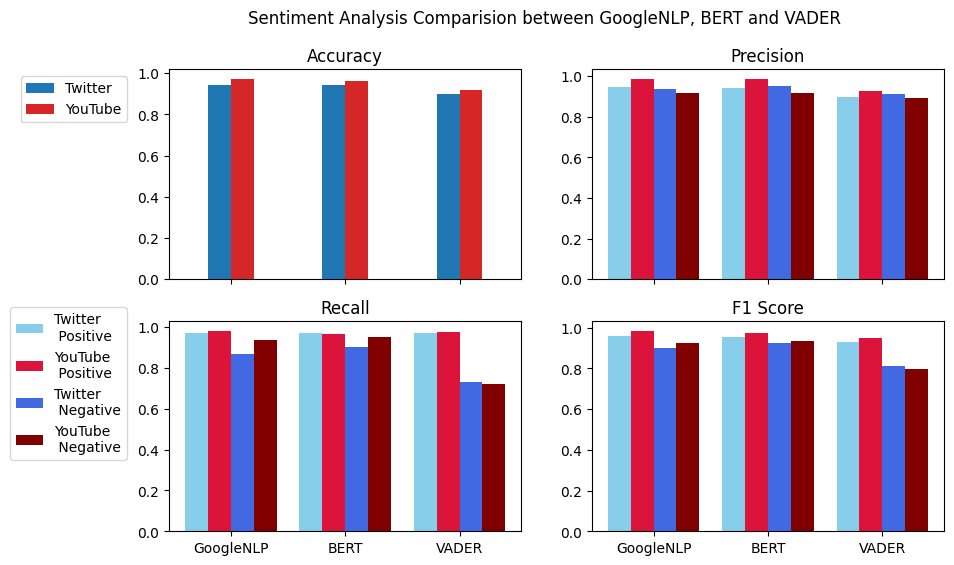

In [15]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(3)
width = 0.2
fig, axs = plt.subplots(2,2, sharex=True)
fig.set_figheight(6)
fig.set_figwidth(10)
axs[0,0].set_title('Accuracy')
axs[0,0].bar(x-0.5*width, model_stats['Accuracy Twitter'], width, color = 'tab:blue')
axs[0,0].bar(x+0.5*width, model_stats['Accuracy YouTube'], width, color = 'tab:red')
axs[0,0].legend(['Twitter', 'YouTube'], bbox_to_anchor=(-0.1,1))



axs[0, 1].set_title('Precision')
axs[0,1].bar(x-1.5*width, model_stats['Positive Precision Twitter'], width, color = 'skyblue')
axs[0,1].bar(x-0.5*width, model_stats['Positive Precision YouTube'], width, color = 'crimson')
axs[0,1].bar(x+0.5*width, model_stats['Negative Precision Twitter'], width, color = 'royalblue')
axs[0,1].bar(x+1.5*width, model_stats['Negative Precision YouTube'], width, color = 'maroon')



axs[1,0].set_title('Recall')
axs[1,0].bar(x-1.5*width, model_stats['Positive Recall Twitter'], width, color = 'skyblue')
axs[1,0].bar(x-0.5*width, model_stats['Positive Recall YouTube'], width, color = 'crimson')
axs[1,0].bar(x+0.5*width, model_stats['Negative Recall Twitter'], width, color = 'royalblue')
axs[1,0].bar(x+1.5*width, model_stats['Negative Recall YouTube'], width, color = 'maroon')
axs[1,0].set_xticks(x, ['GoogleNLP', 'BERT', 'VADER'])
axs[0,1].legend(['Twitter \n Positive', 'YouTube \n Positive', 'Twitter \n Negative', 'YouTube \n Negative'], bbox_to_anchor=(-1.3, -0.1))



axs[1,1].set_title('F1 Score')
axs[1,1].bar(x-1.5*width, model_stats['Positive F1 Twitter'], width, color = 'skyblue')
axs[1,1].bar(x-0.5*width, model_stats['Positive F1 YouTube'], width, color = 'crimson')
axs[1,1].bar(x+0.5*width, model_stats['Negative F1 Twitter'], width, color = 'royalblue')
axs[1,1].bar(x+1.5*width, model_stats['Negative F1 YouTube'], width, color = 'maroon')
axs[1,1].set_xticks(x, ['GoogleNLP', 'BERT', 'VADER'])

fig.suptitle("Sentiment Analysis Comparision between GoogleNLP, BERT and VADER")


For YouTube, the BERT and GoogleNLP models have near identical results. The accuracy is high on both, as are recall and precision both positively and negatively. GoogleNLP's positive YouTube F1 score is marginally higher than BERT's however BERT was slightly better at correctly detecting negative sentiment. VADER, while only a little lower in all positive statistics, seems to suffer greatly on the negative sentiment. This could be due to the thresholds we used. Perhaps if the threshold was lowered a little then maybe more texts would be classified as negative rather than neutral. High precision and low recall shows that it may not classify many texts as negative but the ones it does classify are mostly correct. Maybe VADER finds it easier to classify positively and give a more positive score that goes over our threshold, or maybe YouTube and Twitter data isn't negative enough for it to classify it as negative. I don't know what data GoogleNLP is trained on exactly, but Google owns YouTube so it may have some YouTube data in the training data. It's surprising that BERT is able to be level with GoogleNLP given it was trained on Twitter data. VADER is also fairly good even though it hasn't been trained on such data either, except for the negative sentiment as explained earlier. 

For Twitter, again GoogleNLP and BERT are very similar. GoogleNLP is slightly better again at positive sentiment while BERT is marginally better than GoogleNLP at correctly identifying negative tweets, seen mostly in the negativs recalls and the F1 scores. Again, VADER is only slightly worse than both at the postive tweet detection and classification but the negative tweets, similarly to Twitter, are not being detected when they should be, instead classfied as neutral, which is seen in the very low negative recall. It's not a surprise that BERT is doing well on this data, as it is a Twitter-trained sentiment analyser. GoogleNLP does well to keep up. It probably isn't trained on Twitter but is doing about as well. 

There is a disparity between the positive and negative sentiment classification. BERT is the most balanced, as in there isn't as much of a differnce between the precision, recall, and therefore F1 of both Twitter and YouTube data. The largest differences for BERT are the precision of YouTube data and the recall of Twitter data. It means BERT is not correctly classifying negative YouTube data as much as positive data and the Twitter data that is classified as negative is correct but it's not classifying all the negative data there is. VADER has by far the largest difference between negative and positive classification. Positive classification is about on par with the other two models but it suffers in the negative classification, specifically in the recall. This means that whatever is being classified as negative is generally actually negative, but it is missing a lot of negative tweets and comments for Twitter and YouTube respectively. 

## Part 2 - Emotion Detection

### Exercise 6 *(4 points)*

In the following exercise you will use the emotion classification model [LEIA](https://huggingface.co/LEIA/LEIA-base) to classify the emotion of the sentences in the [enISEAR dataset](https://www.romanklinger.de/data-sets/). You can read more about the `LEIA-base` model in the [documentation](https://huggingface.co/LEIA/LEIA-base) and learn about the implementation details from this [paper](https://arxiv.org/abs/2304.10973).

#### 6.1 LEIA introduction
* Load the `LEIA-base` model and tokenize either as a [pipeline](https://huggingface.co/docs/transformers/main_classes/pipelines), or you can load the model and the tokenizer [directly](https://huggingface.co/docs/transformers/autoclass_tutorial) and implement the classification steps by yourself. LEIA only accepts sentences with up to 128 tokens. Make sure that your tokenizer [truncates](https://huggingface.co/docs/transformers/pad_truncation) longer sentences to this lenght to avoid errors.
* What are the possible labels the model can predict?
* Input the sentence `Today is a great day.` to the model, and predict the emotion of the sentence.

In [11]:
analyzer_LEIA= pipeline("sentiment-analysis", model = 'LEIA/LEIA-base', tokenizer="LEIA/LEIA-base", truncation = True, max_length = 128)
analyzer_LEIA("Today is a good day.")
# The predicted emotion is happiness

[{'label': 'Happiness', 'score': 0.8010136485099792}]

#### 6.2 enISEAR dataset
* Load the enISEAR dataset.
* What are the possible labels in the dataset? (the `Prior_Emotion` column stores the actual label)
* The last 7 columns store the number of annotators who chose the given emotion (e.g. if you have the value 3 in the column 'Anger', this means that 3 annotators believed that the sentence in the row expresses Anger). Create a new column `Annotator_Majority_Label`, which stores the emotion with the highest annotator score (i.e. the emotion the highest number of annotators chose for the given sentence).
* What percent of the sentences were correctly classified by the (majority vote of the) annotators?

In [12]:
eniSEAR_df = pd.read_csv("enISEAR.tsv", sep = '\t')
print(eniSEAR_df['Prior_Emotion'].unique())
# The possible dataset labels are fear, shame, guilt, disgust, sadness, anger, and joy
eniSEAR_df['Annotator_Majority_Label'] = eniSEAR_df[['Anger', 'Disgust', 'Fear', 'Guilt', 'Joy', 'Sadness', 'Shame']].idxmax(axis=1)
print(f'The percentage of correctly classified sentences by humans is {round((eniSEAR_df.Prior_Emotion == eniSEAR_df.Annotator_Majority_Label).sum() / len(eniSEAR_df) * 100, 2)}%')

['Fear' 'Shame' 'Guilt' 'Disgust' 'Sadness' 'Anger' 'Joy']
The percentage of correctly classified sentences by humans is 79.62%


#### 6.3 Classification
* Drop the rows from the enISEAR dataset, where the `Prior_Emotion` is not one of `Fear`, `Sadness`, `Anger` or `Joy`
* Use `Leia` to classify the emotion of each remaining sentence in the dataset, and add a column `Leia_Label` to store the predicted classes
* Now remove `I felt ... ` from the beginning of each sentence, and rerun the classfication. Store your results in a column named `Leia_Label_Clean`
* Where the model predicted `Happiness` or `Affection`, change the prediction to `Joy` to match the dataset's labels (for both columns -> `Leia_Label` and `Leia_Label_Clean`)

In [13]:
# saved as csv to only run sentiment analysis once
# eniSEAR_df = eniSEAR_df.loc[eniSEAR_df['Prior_Emotion'].isin(['Fear','Sadness', 'Anger', 'Joy'])].reset_index(drop = True)
# eniSEAR_df['Leia_Label'] = [analyzer_LEIA(sentence)[0]['label'] for sentence in eniSEAR_df.Sentence]
# eniSEAR_df['Leia_Label_Clean'] = [analyzer_LEIA(sentence)[0]['label'] for sentence in eniSEAR_df.Sentence.str[11:]]
# eniSEAR_df.to_csv('leia_enisear.csv', index=False)


eniSEAR_df = pd.read_csv('leia_enisear.csv')
eniSEAR_df['Leia_Label'] = eniSEAR_df["Leia_Label"].replace(['Happiness', 'Affection'], 'Joy')
eniSEAR_df['Leia_Label_Clean'] = eniSEAR_df["Leia_Label_Clean"].replace(['Happiness', 'Affection'], 'Joy')
eniSEAR_df

,Sentence_id,Prior_Emotion,Sentence,Temporal_Distance,Intensity,Duration,Gender,City,Country,Worker_id,...,Anger,Disgust,Fear,Guilt,Joy,Sadness,Shame,Annotator_Majority_Label,Leia_Label,Leia_Label_Clean
0,271,Fear,"I felt ... when my 2 year old broke her leg, a...",Y,Vi,Dom,Ml,Bristol,GBR,87,...,0,0,0,1,0,3,1,Sadness,Fear,Anger
1,509,Sadness,I felt ... when my Gran passed away.,Y,Vi,Dom,Fl,Stoke-on-trent,GBR,92,...,0,0,0,0,0,5,0,Sadness,Sadness,Sadness
2,218,Fear,I felt ... when an aeroplane I was on hit a he...,Y,Vi,Sh,Ml,Prescot,GBR,63,...,0,0,5,0,0,0,0,Fear,Fear,Fear
3,553,Sadness,I felt ... when my lover Pierre-Guillaume left...,M,Vi,Dom,Fl,NaN,GBR,105,...,4,0,0,0,0,1,0,Anger,Sadness,Sadness
4,58,Anger,I felt ... when someone hit my wife's car and ...,W,Mi,H,Ml,Bristol,GBR,87,...,5,0,0,0,0,0,0,Anger,Sadness,Anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,536,Sadness,I felt ... when an impoverished family we know...,D,I,Dom,Fl,Ely,GBR,62,...,1,0,0,1,0,3,0,Sadness,Sadness,Anger
568,546,Sadness,I felt ... when a horse was killed in the Gran...,Y,Mi,Fm,Ml,Chelmsford,GBR,91,...,0,1,0,0,0,4,0,Sadness,Sadness,Sadness
569,548,Sadness,I felt ... when my college course finished as ...,M,Mi,Dom,Ml,Prescot,GBR,63,...,0,0,0,0,0,5,0,Sadness,Sadness,Sadness
570,555,Sadness,I felt ... when I saw an old man waiting alone...,M,Mi,H,Ml,NaN,GBR,68,...,0,0,0,0,0,5,0,Sadness,Joy,Joy


#### 6.4 Analysis
* Compare the performance of the two approaches, with each other, as well as with the performance of the human majority using the metrics introduced in part 1 (accuracy, precision, recall, f1 score) or other metrics you find interesting. Create informative visualizations to aid the comparison.
* Discuss your results. 
* Are the models accurately predicting human emotions?
* Which approach seems to work better? Why?
* What kind of other/additional preprocessing could we perform to improve the model's predictions?

In [ ]:
# emotion_detection_models = ('Human', 'LEIA', 'LEIA clean')
# emotion_detection_stats = {
#     'Accuracy': (),
#     'Joy Precision': (),
#     'Anger Precision': (),
#     'Sadness Precision': (),
#     'Fear Precision': (),
#     'Joy Recall': (),
#     'Anger Recall': (),
#     'Sadness Recall': (),
#     'Fear Recall': (),
#     'Joy F1': (),
#     'Anger F1': (),
#     'Sadness F1': (),
#     'Fear F1': (),
# }


# I'm sorry that I did not complete this part of the exercise. I thought that this would be the easy part of the task, but seeing as I left it
# a bit late and my brain is a bit melted I was unable to complete this. If I could, then I would make a similar visualization to above, with 
# 4 subplots, each with the three models and with the 4 emotions. Next time I will make sure to respect the analysis part of the task more 
# and spent the time it deserves to have.

Preprocessing could include making sure slang words are either excluded or taken into account. I don't actually know if LEIA does take them into account, probably it does, because I know the people behind it are very smart. While not preprocessing, it may be important to define the emotion words we have. It's very difficult, but different people may interpret these words slightly differently or have a different idea of what they should mean. It would be interesting to see if the results are different if an entire sentence is included, as some of the sentences cut off. Glancing through them, the emotion changes sometimes as the text goes along, so maybe that also influences the final emotion and why the emotion changes when the first first words are cut out.

### Exercise 7 *(6 points)*

#### 7.1 Data annotation
* In the following exercise you will need to test emotion detection methods on data from [Vent](https://www.vent.co/), a website where users talk about their feelings. 
* On GitHub, in your `a03` folder you can find 3 files. First open `sample_for_labeling.csv`, and label each row according the emotion the sentence expresses. The possible classes are: 0 (Sadness), 1 (Affection), 2 (Fear), 3 (Happiness), 4 (Anger). ***Important: Make sure to upload the labeled data with your submission.***
* After you finished labeling the data load it as a pandas dataframe. Also load `sample_with_labels.csv` as a dataframe, which contains the actual labels of the data.
* Merge the two dataframes, and rename the column containing your labels as `label_human`.
* Rename the class ids (0, 1, 2, ...) stored in the `label`, and `label_human` columns to the class names (Sadness, Affection, ...).

In [29]:
vent_df = pd.read_csv('sample_for_labeling.csv')
vent_df['label_human'] = [0, 2, 4, 3, 0, 0, 3, 0, 0, 2, 0, 1, 2, 1, 1, 0, 4, 1, 0, 3, 4, 4, 4, 3, 4, 0, 3, 0, 2, 0]
vent_df_labels = pd.read_csv('sample_with_labels.csv').merge(vent_df[['label_human', 'text']], on = 'text')
vent_df_labels['label_human'] = ['Sadness' if score == 0 else 'Affection' if score == 1 else 'Fear' if score == 2 else 'Happiness' if score == 3 else 'Anger' for score in vent_df_labels.label_human]
vent_df_labels['label'] = ['Sadness' if score == 0 else 'Affection' if score == 1 else 'Fear' if score == 2 else 'Happiness' if score == 3 else 'Anger' for score in vent_df_labels.label]
vent_df_labels.to_csv("labeled_vent.csv")

#### 7.2 LEIA
* Use the [LEIA](https://huggingface.co/LEIA/LEIA-base) model introduced in the previous exercise to classify the sentences and store the results in a column named `label_leia`.

In [15]:
vent_df_labels['label_leia'] = [analyzer_LEIA(sentence)[0]['label'] for sentence in vent_df_labels.text]
vent_df_labels

,text,label,label_human,label_leia
0,my life is nothing.,Sadness,Sadness,Sadness
1,I'm also scared ive fucked up,Fear,Fear,Fear
2,Woke up at 4am...still cannot fall asleep and ...,Anger,Anger,Anger
3,GUYS I SAW THE HOT GUY FROM CHURCH TODAY AND I...,Happiness,Happiness,Happiness
4,i only like black guys,Affection,Sadness,Affection
5,Why can't everything be more simple?,Anger,Sadness,Fear
6,We are going to travel the world together one ...,Happiness,Happiness,Affection
7,When your boyfriend cheats on you😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊,Anger,Sadness,Anger
8,i literally have no idea what i was even tryin...,Fear,Sadness,Anger
9,I really don't want to go to school today i ha...,Fear,Fear,Fear


#### 7.3 Openai models
* In the following exercise we will work with the [openai API](https://platform.openai.com/docs/api-reference), an API which allows you to access very powerful AI models. Your task will be to use a [text completion](https://platform.openai.com/docs/api-reference/completions/) or a [chat completion](https://platform.openai.com/docs/guides/chat/introduction) model to classify the sentences in `sample_with_labels.csv` according to their emotion (Sadness, Affection, Fear, Happiness, Anger).
* You can sign up for the API by providing a phone number, and get 5 USD of free credits, which should be more than enough to complete this exercise.
* If you use your own account, you can use any text completion/chat completion model to complete the exercise, you are also allowed to [fine-tune](https://platform.openai.com/docs/api-reference/fine-tunes) one of the text completion models, and use it for classification.
* If you can't/don't want to sign up for the API, we created an API wrapper, through wich you can use the `gpt-3.5-turbo` model. We set a limit of 1_000_000 tokens per API key, which should be more than enough to complete the task, so feel free to experiment to find the best prompt.
* In your `a03` folder, you can find a file named `api_key.txt`, which stores your API key you will need to use the API wrapper. ***Important: this is not a real openai API key, we use it internally in the API wrapper, to monitor usage***
* To set up the API wrapper with the openai module, run the following code:
```python
import openai
openai.api_base = 'https://smdapi-1-a6938250.deta.app'
your_api_key = '' # your key from api_key.txt
openai.api_key = your_api_key
```
* After you run this setup, you can use the `openai.ChatCompletion.create` function just like when your are using the openai module ([documentation](https://platform.openai.com/docs/guides/chat)).
* Store the results in a column named `label_gpt`.

In [19]:
# install requirements
# !pip install openai

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import openai
openai.api_base = 'https://smdapi-1-a6938250.deta.app'
your_api_key = '1Eu2H5v7K7zT980I01v4' # your key from api_key.txt
openai.api_key = your_api_key

In [28]:
# hint: chat completion example from https://platform.openai.com/docs/guides/chat/introduction
# this is needed as sometimes it put a period at the 
from string import punctuation
def gpt_labeling(sentence):
  return openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "user", "content": f"You must choose one of the words Sadness, Affection, Fear, Happiness, Anger. Do not return any other sentences or words, only use the words Sadness, Affection, Fear, Happiness, Anger. Choose the word that best describes the sentiment in the sentence: {sentence}"}
    ]
  )['choices'][0]['message']['content'].strip(punctuation)
vent_df_labels['label_gpt'] = [gpt_labeling(sentence) for sentence in vent_df_labels.text]

APIError: HTTP code 502 from API (<h3>Error Type:</h3>
		<p></p>
		<h3>Error Message:</h3>
		<p>2023-06-21T18:33:18.349Z 824b2fea-8dd7-4612-8a2a-d62b35949bdc Task timed out after 20.02 seconds</p>
		<h3>Logs:</h3>
		<pre></pre>
	)

#### 7.4 Comparison
* Compare the performance of the two models, with each other, as well as with the quality of your annotation using the metrics introduced in part 1 (accuracy, precision, recall, f1 score) or other metrics you find interesting. Create informative visualizations to aid the comparison.
* Discuss your results. 
* Are the models accurately predicting human emotions?
* Which approach seems to work better? Why?

In [25]:
vent_models = ('Accuracy', 'Precision', 'Recall', 'F1')
# I'm very sorry for the incredibly messy code here. I did try to streamline it but it ended up not running at all, so instead went with the brute force approach
# This has the accuracy, precision, recall, and F1 for the three models
vent_stats = {
    'Human': (classCounter(vent_df_labels, 'label_human', calcType='custom') / 30, 
    classCounter(vent_df_labels, 'label_human', calcType='custom')/(classCounter(vent_df_labels, 'label_human', calcType='custom') + classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Sadness', reverse=True)+ classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Fear', reverse=True)+classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Happiness', reverse=True) +classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Anger', reverse=True)+classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Affection', reverse=True)), 
    classCounter(vent_df_labels, 'label_human', calcType='custom')/(classCounter(vent_df_labels, 'label_human', calcType='custom') + classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Sadness', inverse=True)+ classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Fear', inverse=True)+classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Happiness', inverse=True) +classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Anger', inverse=True)+classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Affection', inverse=True)), 
    2 * (classCounter(vent_df_labels, 'label_human', calcType='custom')/(classCounter(vent_df_labels, 'label_human', calcType='custom') + classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Sadness', inverse=True)+ classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Fear', inverse=True)+classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Happiness', inverse=True) +classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Anger', inverse=True)+classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Affection', inverse=True)) + classCounter(vent_df_labels, 'label_human', calcType='custom')/(classCounter(vent_df_labels, 'label_human', calcType='custom') + classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Sadness', reverse=True)+ classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Fear', reverse=True)+classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Happiness', reverse=True) +classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Anger', reverse=True)+classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Affection', reverse=True)))/(classCounter(vent_df_labels, 'label_human', calcType='custom')/(classCounter(vent_df_labels, 'label_human', calcType='custom') + classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Sadness', inverse=True)+ classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Fear', inverse=True)+classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Happiness', inverse=True) +classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Anger', inverse=True)+classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Affection', inverse=True)) *     classCounter(vent_df_labels, 'label_human', calcType='custom')/(classCounter(vent_df_labels, 'label_human', calcType='custom') + classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Sadness', reverse=True)+ classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Fear', reverse=True)+classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Happiness', reverse=True) +classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Anger', reverse=True)+classCounter(vent_df_labels, 'label_human', calcType='custom', customWord='Affection', reverse=True)))),    
    'Leia': (classCounter(vent_df_labels, 'label_leia', calcType='custom') / 30, 
    classCounter(vent_df_labels, 'label_leia', calcType='custom')/(classCounter(vent_df_labels, 'label_leia', calcType='custom') + classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Sadness', reverse=True)+ classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Fear', reverse=True)+classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Happiness', reverse=True) +classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Anger', reverse=True)+classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Affection', reverse=True)), 
    classCounter(vent_df_labels, 'label_leia', calcType='custom')/(classCounter(vent_df_labels, 'label_leia', calcType='custom') + classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Sadness', inverse=True)+ classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Fear', inverse=True)+classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Happiness', inverse=True) +classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Anger', inverse=True)+classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Affection', inverse=True)), 
    2 * (classCounter(vent_df_labels, 'label_leia', calcType='custom')/(classCounter(vent_df_labels, 'label_leia', calcType='custom') + classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Sadness', inverse=True)+ classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Fear', inverse=True)+classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Happiness', inverse=True) +classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Anger', inverse=True)+classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Affection', inverse=True)) + classCounter(vent_df_labels, 'label_leia', calcType='custom')/(classCounter(vent_df_labels, 'label_leia', calcType='custom') + classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Sadness', reverse=True)+ classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Fear', reverse=True)+classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Happiness', reverse=True) +classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Anger', reverse=True)+classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Affection', reverse=True)))/(classCounter(vent_df_labels, 'label_leia', calcType='custom')/(classCounter(vent_df_labels, 'label_leia', calcType='custom') + classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Sadness', inverse=True)+ classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Fear', inverse=True)+classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Happiness', inverse=True) +classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Anger', inverse=True)+classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Affection', inverse=True)) * classCounter(vent_df_labels, 'label_leia', calcType='custom')/(classCounter(vent_df_labels, 'label_leia', calcType='custom') + classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Sadness', reverse=True)+ classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Fear', reverse=True)+classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Happiness', reverse=True) +classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Anger', reverse=True)+classCounter(vent_df_labels, 'label_leia', calcType='custom', customWord='Affection', reverse=True)))),    
    'OpenAI': (classCounter(vent_df_labels, 'label_gpt', calcType='custom') / 30, 
    classCounter(vent_df_labels, 'label_gpt', calcType='custom')/(classCounter(vent_df_labels, 'label_gpt', calcType='custom') + classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Sadness', reverse=True)+ classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Fear', reverse=True)+classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Happiness', reverse=True) +classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Anger', reverse=True)+classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Affection', reverse=True)), 
    classCounter(vent_df_labels, 'label_gpt', calcType='custom')/(classCounter(vent_df_labels, 'label_gpt', calcType='custom') + classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Sadness', inverse=True)+ classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Fear', inverse=True)+classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Happiness', inverse=True) +classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Anger', inverse=True)+classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Affection', inverse=True)), 
    2 * (classCounter(vent_df_labels, 'label_gpt', calcType='custom')/(classCounter(vent_df_labels, 'label_gpt', calcType='custom') + classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Sadness', inverse=True)+ classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Fear', inverse=True)+classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Happiness', inverse=True) +classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Anger', inverse=True)+classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Affection', inverse=True)) + classCounter(vent_df_labels, 'label_gpt', calcType='custom')/(classCounter(vent_df_labels, 'label_gpt', calcType='custom') + classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Sadness', reverse=True)+ classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Fear', reverse=True)+classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Happiness', reverse=True) +classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Anger', reverse=True)+classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Affection', reverse=True)))/(classCounter(vent_df_labels, 'label_gpt', calcType='custom')/(classCounter(vent_df_labels, 'label_gpt', calcType='custom') + classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Sadness', inverse=True)+ classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Fear', inverse=True)+classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Happiness', inverse=True) +classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Anger', inverse=True)+classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Affection', inverse=True)) *     classCounter(vent_df_labels, 'label_gpt', calcType='custom')/(classCounter(vent_df_labels, 'label_gpt', calcType='custom') + classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Sadness', reverse=True)+ classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Fear', reverse=True)+classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Happiness', reverse=True) +classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Anger', reverse=True)+classCounter(vent_df_labels, 'label_gpt', calcType='custom', customWord='Affection', reverse=True))))}


ValueError: not enough values to unpack (expected 2, got 0)

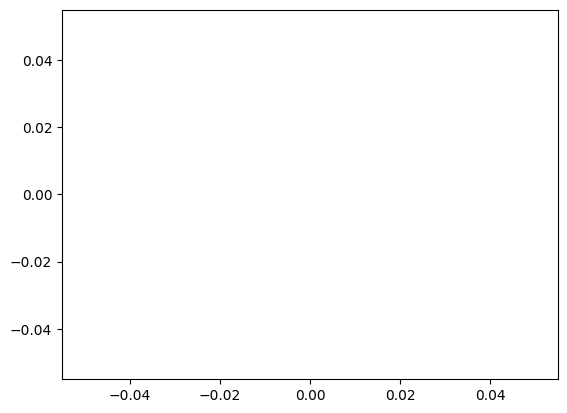

In [27]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(3)

fig, axis = plt.plot()
width = 0.5
axis.set_title('Vent Dataset Model Comparison')
axis.bar(x-1.5*width, vent_stats['Human'], width, color = 'limegreen')
axis.bar(x, vent_stats['LEIA'], width, color = 'blueviolet')
axis.bar(x+1.5*width, vent_stats['OpenAI'], width, color = 'orange')
axs[0,1].legend(['Human', 'LEIA', 'OpenAI'], bbox_to_anchor=(-1.3, -0.1))

LEIA is quite accurate, getting most of the labels correct. Interestingly, the ones where it's not correct, a few times it chooses the same as the human who also got it wrong. It shows that this dataset is super subjective, especially a few texts where all four labels or at least three are different. Sometimes the text is also multiple emotions, which makes sense when one remembers this a website for people tp talk about their feelings, and sometimes one just writes a long stream of consciousness that doesn't really make a lot of sense and has high emotion but not always the same emotion throughout. A couple texts also completely change emotion at the very end, perhaps after LEIA is cutting the text to the maximum of 128 tokens. This also affects the accuracy and precision of the emotion analysis.

OpenAI actually isn't too bad at predicting the emotions. There are a couple texts where it disagrees with the label and both LEIA and the human, and also for a couple it insisted on not using the five words given to it, either saying there is no sentiment (which I would actually agree on and I mislabeled it as well) or somehow coming up with new words, confusion and frustration. The frustration one makes sense, as does fit the text, and both human and LEIA are different to the real label, but that's not what was asked of it, and the same for the one labeled confusion.